## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [64]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from datetime import datetime, timedelta

In [65]:
df = pd.read_csv('GOOG.csv') # data_importing
df.head(10) # printing first 10 rows 

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0.0,1.0


## STEP 2 : GATHERING INSIGHTS AND CLEANING DATA


In [66]:
# shape of data
print("Shape of data:",df.shape) #dimensions of table

Shape of data: (1258, 14)


In [67]:
# printing summary of the csv file
df.describe()# prints count, mean, std, min etc.

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [68]:
# summary of data
df.info()
#info is used for
#The total number of non-null values in each column.
#The data type of each column.
#The memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [69]:
# checking null values
df.isnull().sum()


symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

No null values

In [70]:
df = df[['date','open','close']] # Extracting required columns, replaces the original df to only contain these 3 values


In [71]:
df.head(5)

,date,open,close
0,2016-06-14 00:00:00+00:00,716.48,718.27
1,2016-06-15 00:00:00+00:00,719.00,718.92
2,2016-06-16 00:00:00+00:00,714.91,710.36
3,2016-06-17 00:00:00+00:00,708.65,691.72
4,2016-06-20 00:00:00+00:00,698.77,693.71


In [72]:
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) 
# converting object dtype of date column to datetime dtype
#also split the values and removed redundant date
df.set_index('date',drop=True,inplace=True) # Setting date column as index
#the 'date' column will become the index, and you will no longer have it as a regular column in the DataFrame.
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


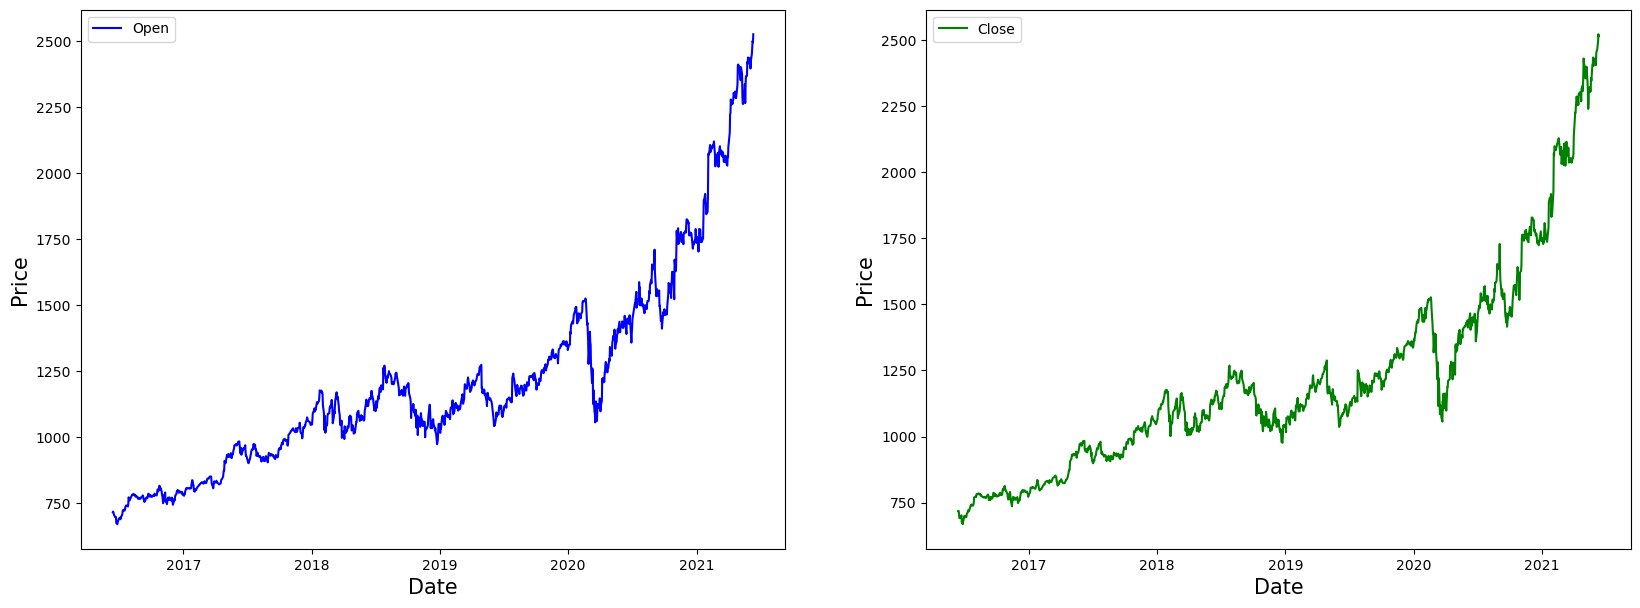

In [42]:
# plotting open and closing price on date index
# the markings on x and y axis are done automatically by the data
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend() # for the open tag in top left

ax[1].plot(df['close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend() # close tag on top left of right graph

fig.show()

## STEP 3 : DATA PRE-PROCESSING

In [43]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler() #sklearn
#converts values to range them between 0 and 1, uses formula orig-min/max-min
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [44]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [45]:
train_data = df[:training_size]# 0 to training_size
test_data  = df[training_size:]# training_size to end

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [46]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))
#in a nutshell takes 50 rows(sequence) and 51st value(label) and passes them as an array.

In [47]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape
#printing out dimensions for these arrays/list

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

## STEP 4 :  CREATING LSTM MODEL

In [48]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Importing Libraries:

model = Sequential(): This line initializes a sequential model, which is a linear stack of layers in Keras. In a sequential model, you can add layers one after the other.
Adding Layers to the Model:

model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])): This line adds an LSTM (Long Short-Term Memory) layer to the model. Here's what each parameter means:

units=50: This LSTM layer has 50 units, which are essentially the number of memory cells or neurons in the layer.
return_sequences=True: This parameter indicates that the LSTM layer should return sequences as output. This is common when you have multiple sequential layers stacked on top of each other.
input_shape=(train_seq.shape[1], train_seq.shape[2]): Specifies the input shape of the data. train_seq is a NumPy array that contains sequences of data. train_seq.shape[1] represents the number of time steps in each sequence, and train_seq.shape[2] is the number of features in each time step.
model.add(Dropout(0.1)): This line adds a dropout layer with a dropout rate of 0.1 (10%). Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 during training.

model.add(LSTM(units=50): Another LSTM layer with 50 units is added. This layer doesn't have return_sequences=True, so it doesn't return sequences but produces a fixed-length output.

model.add(Dense(2): This line adds a fully connected dense layer with 2 units. This layer typically represents the output layer of the model. The choice of 2 units suggests that this model might be used for a regression task with two output values.

Compiling the Model:

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error']): This line compiles the model. Here's what each parameter means:
loss='mean_squared_error': The loss function used for training the model. In this case, it's the mean squared error, which is commonly used for regression tasks.
optimizer='adam': The optimizer used for updating the model's weights during training. Adam is a popular optimization algorithm.
metrics=['mean_absolute_error']: Metrics used to evaluate the model during training. Here, it tracks the mean absolute error, which is another regression metric.
Displaying Model Summary:

model.summary(): This line prints a summary of the model's architecture, including the number of parameters in each layer
          

In [49]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)
# The epochs parameter specifies the number of times the entire training dataset is passed forward and backward through the neural network. 
#In this case, the model is trained for 100 epochs, meaning it will iterate through the entire training data 100 times.

Epoch 1/100
28/28 [==============================] - 2s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0624 - val_loss: 0.0139 - val_mean_absolute_error: 0.0929
Epoch 2/100
28/28 [==============================] - 0s 15ms/step - loss: 9.8219e-04 - mean_absolute_error: 0.0251 - val_loss: 0.0090 - val_mean_absolute_error: 0.0775
Epoch 3/100
28/28 [==============================] - 0s 14ms/step - loss: 4.7353e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0034 - val_mean_absolute_error: 0.0445
Epoch 4/100
28/28 [==============================] - 0s 15ms/step - loss: 4.4477e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0058 - val_mean_absolute_error: 0.0606
Epoch 5/100
28/28 [==============================] - 0s 15ms/step - loss: 4.2359e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0053 - val_mean_absolute_error: 0.0576
Epoch 6/100
28/28 [==============================] - 0s 15ms/step - loss: 4.2711e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0041 - val_mean_absolute_error: 0.0

28/28 [==============================] - 0s 15ms/step - loss: 1.1525e-04 - mean_absolute_error: 0.0075 - val_loss: 0.0020 - val_mean_absolute_error: 0.0376
Epoch 98/100
28/28 [==============================] - 0s 15ms/step - loss: 1.1868e-04 - mean_absolute_error: 0.0078 - val_loss: 6.8852e-04 - val_mean_absolute_error: 0.0201
Epoch 99/100
28/28 [==============================] - 0s 15ms/step - loss: 1.1181e-04 - mean_absolute_error: 0.0075 - val_loss: 0.0015 - val_mean_absolute_error: 0.0306
Epoch 100/100
28/28 [==============================] - 0s 15ms/step - loss: 1.0770e-04 - mean_absolute_error: 0.0074 - val_loss: 0.0023 - val_mean_absolute_error: 0.0404


In [50]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]
#model.predict(...): This is a method used to make predictions using a trained Keras model. 
   # It takes the test data (test_seq) as input and returns the model's predictions for that data.

9/9 [==============================] - 0s 4ms/step


array([[0.39140168, 0.39437607],
       [0.39054725, 0.39404103],
       [0.3863446 , 0.39029023],
       [0.39047757, 0.3937115 ],
       [0.3941301 , 0.39704737]], dtype=float32)

In [51]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1396.6273, 1399.173 ],
       [1395.0433, 1398.552 ],
       [1387.252 , 1391.6005],
       [1394.9142, 1397.9413],
       [1401.6857, 1404.1238]], dtype=float32)

## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

In [52]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [53]:
# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1396.627319,1399.172974
2020-05-28,1396.86,1416.73,1395.043335,1398.552002
2020-05-29,1416.94,1428.92,1387.251953,1391.600464
2020-06-01,1418.39,1431.82,1394.914185,1397.941284
2020-06-02,1430.55,1439.22,1401.685669,1404.123779


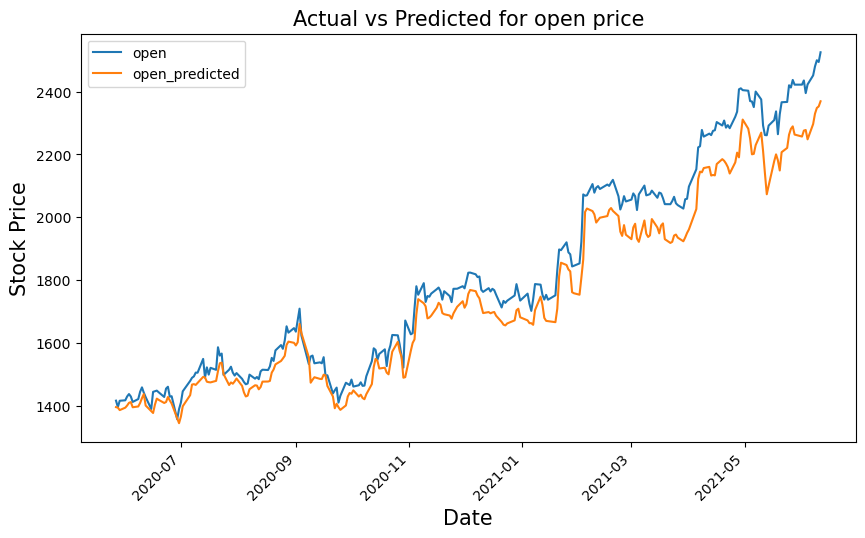

In [54]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

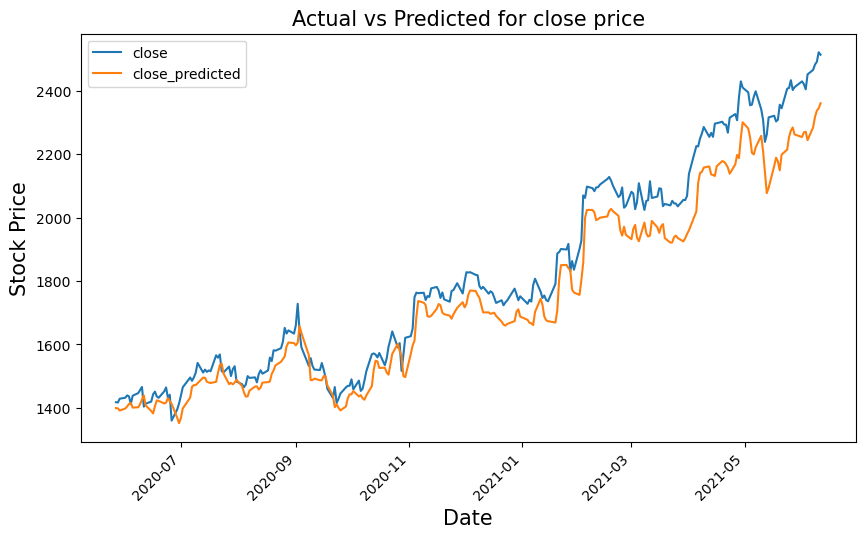

In [55]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP 6. PREDICTING UPCOMING 10 DAYS

In [56]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.add(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2020-05-20':'2020-05-27']

,open,close,open_predicted,close_predicted
2020-05-27,NaN,NaN,NaN,NaN


In [57]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [58]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 8ms/step


In [59]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

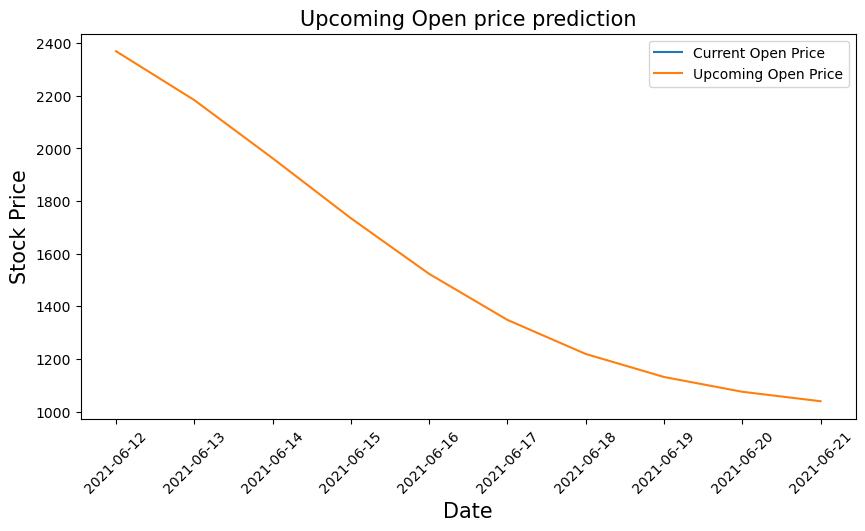

In [60]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

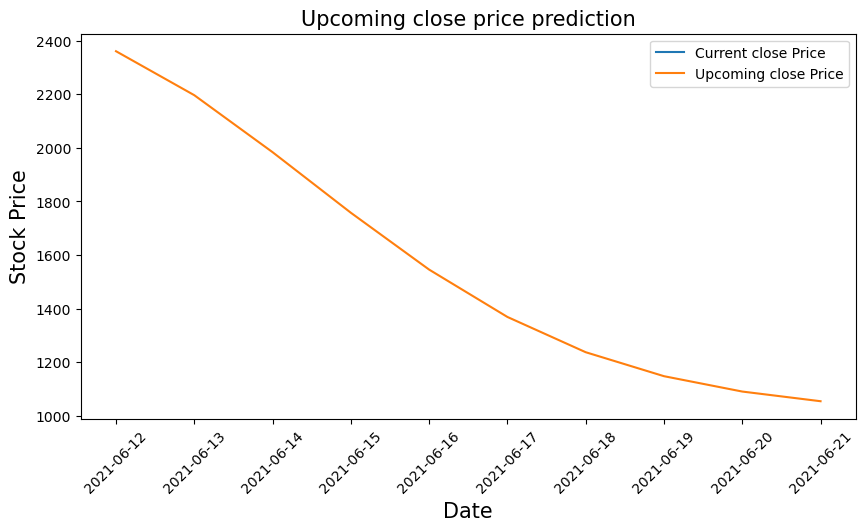

In [61]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# THANK YOU!